In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('train.csv')

In [8]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

In [12]:
len(df)

614

In [14]:
50/614 * 100

8.143322475570033

In [19]:
len(df.dropna())

480

In [20]:
614- 480

134

In [22]:
df[df['Gender'].isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


In [23]:
df['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [24]:
new_df = df.dropna()

In [68]:
new_df = df.drop('Loan_ID',axis = 1)

In [69]:
X = pd.get_dummies(new_df.drop('Loan_Status',axis=1),drop_first=True)

In [70]:
y = new_df['Loan_Status']

In [33]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

C:\Users\vaoni\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\vaoni\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\vaoni\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


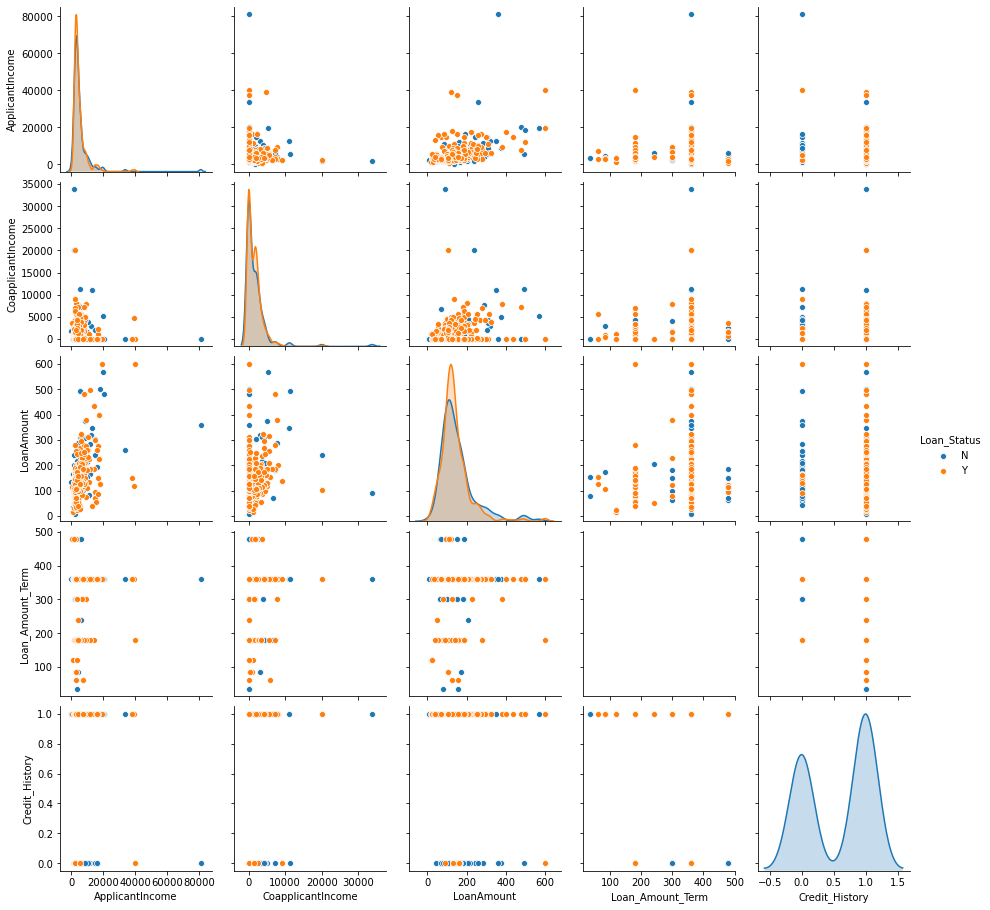

In [35]:
sns.pairplot(new_df,hue = 'Loan_Status')

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
from sklearn.model_selection import GridSearchCV

In [73]:
model = RandomForestClassifier(random_state = 42)

In [77]:
param_grid = {'bootstrap':[True,False],'n_estimators':[10,20,50,100,200,300],'max_features':['auto','log2'],'criterion':['gini','entropy'],
             }

In [78]:
grid = GridSearchCV(model,param_grid)

In [79]:
grid.fit(X_train,y_train)

C:\Users\vaoni\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\vaoni\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vaoni\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 303, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\vaoni\anaconda3\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\vaoni\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 73, in inner_f
    return f(**kwargs)
  File "C:\Users\vaoni\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 796, in check_X_y
    X = check_array(X, accept_sparse=accept_sparse,
  Fi

C:\Users\vaoni\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\vaoni\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vaoni\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 303, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\vaoni\anaconda3\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\vaoni\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 73, in inner_f
    return f(**kwargs)
  File "C:\Users\vaoni\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 796, in check_X_y
    X = check_array(X, accept_sparse=accept_sparse,
  Fi

C:\Users\vaoni\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\vaoni\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vaoni\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 303, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\vaoni\anaconda3\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\vaoni\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 73, in inner_f
    return f(**kwargs)
  File "C:\Users\vaoni\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 796, in check_X_y
    X = check_array(X, accept_sparse=accept_sparse,
  Fi

C:\Users\vaoni\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\vaoni\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vaoni\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 303, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\vaoni\anaconda3\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\vaoni\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 73, in inner_f
    return f(**kwargs)
  File "C:\Users\vaoni\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 796, in check_X_y
    X = check_array(X, accept_sparse=accept_sparse,
  Fi

C:\Users\vaoni\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\vaoni\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vaoni\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 303, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\vaoni\anaconda3\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\vaoni\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 73, in inner_f
    return f(**kwargs)
  File "C:\Users\vaoni\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 796, in check_X_y
    X = check_array(X, accept_sparse=accept_sparse,
  Fi

C:\Users\vaoni\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\vaoni\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vaoni\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 303, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\vaoni\anaconda3\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\vaoni\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 73, in inner_f
    return f(**kwargs)
  File "C:\Users\vaoni\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 796, in check_X_y
    X = check_array(X, accept_sparse=accept_sparse,
  Fi

C:\Users\vaoni\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\vaoni\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vaoni\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 303, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\vaoni\anaconda3\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\vaoni\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 73, in inner_f
    return f(**kwargs)
  File "C:\Users\vaoni\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 796, in check_X_y
    X = check_array(X, accept_sparse=accept_sparse,
  Fi

C:\Users\vaoni\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\vaoni\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vaoni\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 303, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\vaoni\anaconda3\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\vaoni\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 73, in inner_f
    return f(**kwargs)
  File "C:\Users\vaoni\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 796, in check_X_y
    X = check_array(X, accept_sparse=accept_sparse,
  Fi

C:\Users\vaoni\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\vaoni\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\vaoni\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 303, in fit
    X, y = self._validate_data(X, y, multi_output=True,
  File "C:\Users\vaoni\anaconda3\lib\site-packages\sklearn\base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\vaoni\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 73, in inner_f
    return f(**kwargs)
  File "C:\Users\vaoni\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 796, in check_X_y
    X = check_array(X, accept_sparse=accept_sparse,
  Fi

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [45]:
grid.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_features': 'auto',
 'n_estimators': 100}

In [62]:
y_pred = grid.predict(X_test)

In [48]:
from sklearn.metrics import classification_report,plot_confusion_matrix

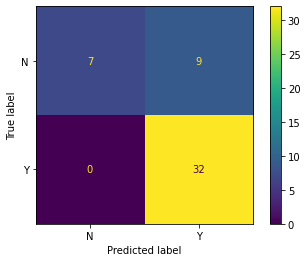

In [49]:
plot_confusion_matrix(grid,X_test,y_test)

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           N       1.00      0.44      0.61        16
           Y       0.78      1.00      0.88        32

    accuracy                           0.81        48
   macro avg       0.89      0.72      0.74        48
weighted avg       0.85      0.81      0.79        48



In [53]:
from joblib import dump

In [54]:
dump(grid,'loan_model.joblib')

['loan_model.joblib']

In [56]:
grid.fit(X,y)

GridSearchCV(estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [10, 20, 50, 100, 200, 300]})

In [57]:
dump(grid,'loan_model_2.joblib')

['loan_model_2.joblib']

In [58]:
grid.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_features': 'auto',
 'n_estimators': 300}

In [59]:
grid.best_score_

0.8145833333333332

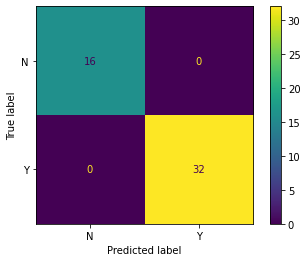

In [61]:
plot_confusion_matrix(grid,X_test,y_test)

In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           N       1.00      1.00      1.00        16
           Y       1.00      1.00      1.00        32

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



In [72]:
len(X_train.columns)

14